## Bike Sharing Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.shape

(730, 16)

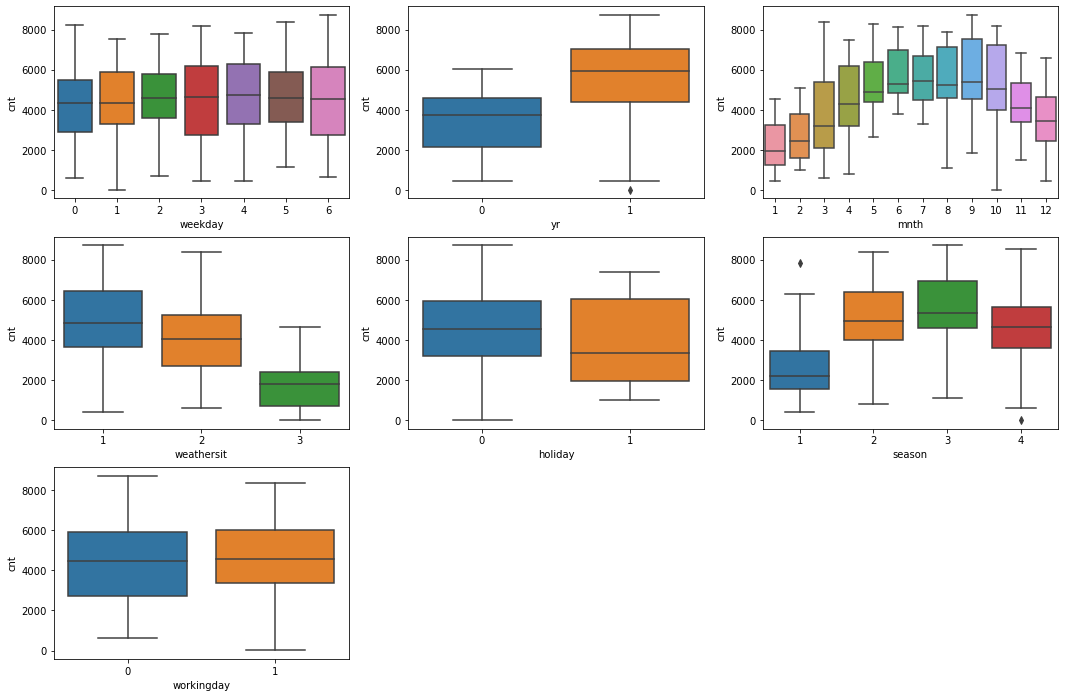

In [4]:
# visualizing data

# visualizing categorical variables with cnt

plt.figure(figsize= (18,12))
plt.subplot(3, 3, 1)
sns.boxplot(x = "weekday", y = "cnt", data= data)

plt.subplot(3, 3, 2)
sns.boxplot(x = "yr", y = "cnt", data= data)

plt.subplot(3, 3, 3)
sns.boxplot(x = "mnth", y = "cnt", data= data)

plt.subplot(3, 3, 4)
sns.boxplot(x = "weathersit", y = "cnt", data= data)

plt.subplot(3, 3, 5)
sns.boxplot(x = "holiday", y = "cnt", data= data)

plt.subplot(3, 3, 6)
sns.boxplot(x = "season", y = "cnt", data= data)

plt.subplot(3, 3, 7)
sns.boxplot(x = "workingday", y = "cnt", data= data)

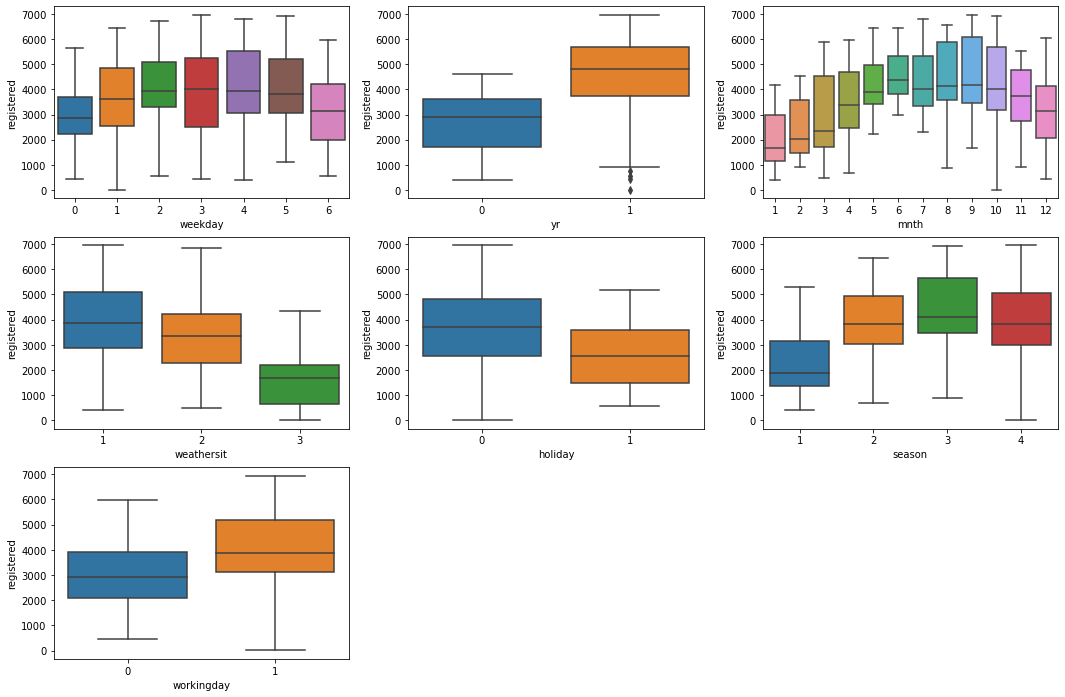

In [5]:
# visualizing categorical variables with registered

plt.figure(figsize= (18,12))
plt.subplot(3, 3, 1)
sns.boxplot(x = "weekday", y = "registered", data= data)

plt.subplot(3, 3, 2)
sns.boxplot(x = "yr", y = "registered", data= data)

plt.subplot(3, 3, 3)
sns.boxplot(x = "mnth", y = "registered", data= data)

plt.subplot(3, 3, 4)
sns.boxplot(x = "weathersit", y = "registered", data= data)

plt.subplot(3, 3, 5)
sns.boxplot(x = "holiday", y = "registered", data= data)

plt.subplot(3, 3, 6)
sns.boxplot(x = "season", y = "registered", data= data)

plt.subplot(3, 3, 7)
sns.boxplot(x = "workingday", y = "registered", data= data)

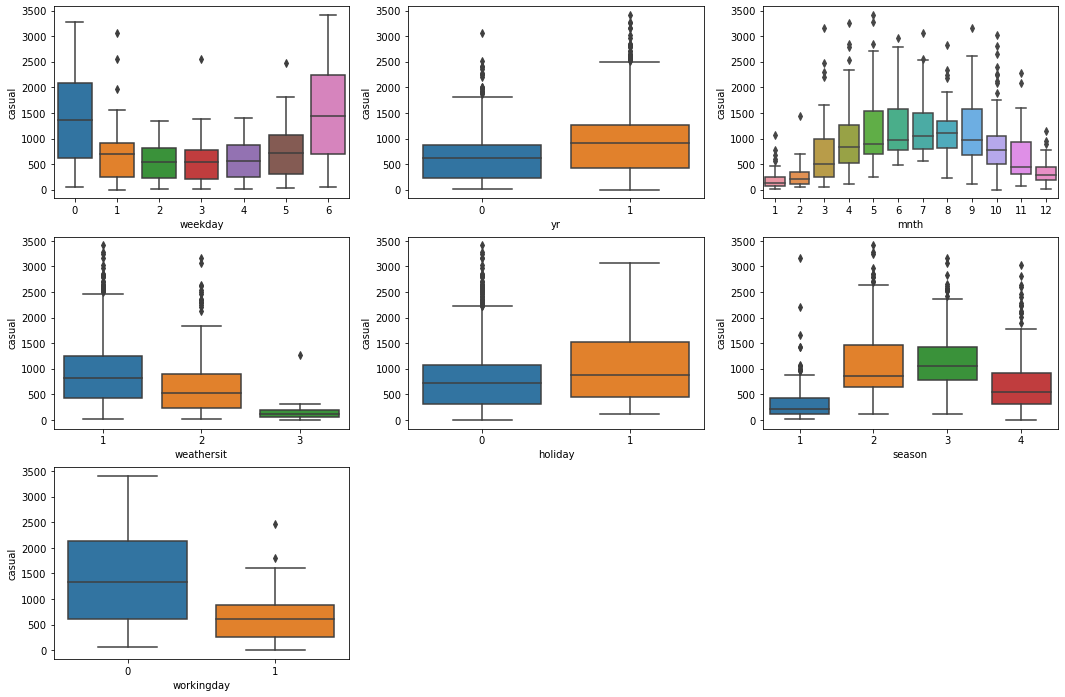

In [6]:
# visualizing categorical variables with casual

plt.figure(figsize= (18,12))
plt.subplot(3, 3, 1)
sns.boxplot(x = "weekday", y = "casual", data= data)

plt.subplot(3, 3, 2)
sns.boxplot(x = "yr", y = "casual", data= data)

plt.subplot(3, 3, 3)
sns.boxplot(x = "mnth", y = "casual", data= data)

plt.subplot(3, 3, 4)
sns.boxplot(x = "weathersit", y = "casual", data= data)

plt.subplot(3, 3, 5)
sns.boxplot(x = "holiday", y = "casual", data= data)

plt.subplot(3, 3, 6)
sns.boxplot(x = "season", y = "casual", data= data)

plt.subplot(3, 3, 7)
sns.boxplot(x = "workingday", y = "casual", data= data)

### Dummy variables and Binary features

In [7]:
# Encoding Seasons using get_dummies

seasn = pd.get_dummies(data['season'], drop_first=True)
seasn = seasn.rename(columns={2: 'summer', 3:'fall', 4:'winter'})
data = pd.concat([data, seasn], axis=1)
data = data.drop('season', axis=1)
data.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [8]:
# yr

year = pd.get_dummies(data['yr'], drop_first=True)
year = year.rename(columns={1:'2019'})
data = pd.concat([data, year], axis=1)
data = data.drop('yr', axis=1)
data.head()

,instant,dteday,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter,2019
0,1,01-01-2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,0
1,2,02-01-2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,0
2,3,03-01-2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0
3,4,04-01-2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0
4,5,05-01-2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0


In [9]:
# mnth

month = pd.get_dummies(data['mnth'], drop_first=True)
month = month.rename(columns={2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8: 'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12: 'Dec'})
data = pd.concat([data, month], axis=1)
data = data.drop('mnth', axis=1)
data.head()

,instant,dteday,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,01-01-2018,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# weathersit

ws = pd.get_dummies(data['weathersit'], drop_first=True)
ws = ws.rename(columns={2:'mist', 3:'light_snow'})
data = pd.concat([data, ws], axis=1)
data = data.drop('weathersit', axis=1)
data.head()

,instant,dteday,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,mist,light_snow
0,1,01-01-2018,0,6,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,1,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,0,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,0,2,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,0,3,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Drop unnecessary columns

data = data.drop(['dteday', 'instant'], axis=1)

In [12]:
# weekday

wd = pd.get_dummies(data['weekday'], drop_first=True)
wd = wd.rename(columns={1: 'd1', 2: 'd2', 3: 'd3', 4:'d4', 5:'d5', 6:'d6'})
data = pd.concat([data, wd], axis=1)
data = data.drop('weekday', axis=1)
data.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,...,Nov,Dec,mist,light_snow,d1,d2,d3,d4,d5,d6
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,...,0,0,0,0,0,0,1,0,0,0


Now that we are done with encoding, we can move to Feature scaling the numerical data.

### Train Test Split

In [13]:
df_train, df_test = train_test_split(data, test_size=0.3, random_state=100)

### Feature Scaling

In [14]:
scaler = MinMaxScaler()

In [15]:
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [16]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,...,Nov,Dec,mist,light_snow,d1,d2,d3,d4,d5,d6
653,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,0,0,0,0,0,1,0,0,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,1,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0,...,0,0,1,0,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0,...,0,1,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,...,0,0,1,0,0,0,0,0,0,1


### Dividing into X and y sets for model building

### Considering "cnt" as a dependant variable

In [17]:
y_cnt_train = df_train.pop('cnt')
X_cnt_train = df_train

X_cnt_train = X_cnt_train.drop(['casual', 'registered'], axis=1)

In [18]:
X_cnt_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', '2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'mist', 'light_snow', 'd1', 'd2',
       'd3', 'd4', 'd5', 'd6'],
      dtype='object')

### Model Building

In [19]:
lms = LinearRegression()
lms.fit(X_cnt_train, y_cnt_train)
rfe = RFE(lms, 15)
rfe = rfe.fit(X_cnt_train, y_cnt_train)

In [20]:
list(zip(X_cnt_train, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 7),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Feb', False, 12),
 ('Mar', False, 8),
 ('Apr', False, 11),
 ('May', False, 9),
 ('Jun', False, 10),
 ('Jul', False, 13),
 ('Aug', False, 4),
 ('Sep', True, 1),
 ('Oct', False, 6),
 ('Nov', False, 14),
 ('Dec', False, 15),
 ('mist', False, 2),
 ('light_snow', True, 1),
 ('d1', True, 1),
 ('d2', True, 1),
 ('d3', True, 1),
 ('d4', True, 1),
 ('d5', True, 1),
 ('d6', False, 3)]

In [21]:
col = X_cnt_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       '2019', 'Sep', 'light_snow', 'd1', 'd2', 'd3', 'd4', 'd5'],
      dtype='object')

### Using statsmodel for detailed analysis

In [22]:
X_cnt_train_rfe = X_cnt_train[col]

In [23]:
# create a constant

X_cnt_train_rfe = sm.add_constant(X_cnt_train_rfe)
lm = sm.OLS(y_cnt_train, X_cnt_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          2.07e-181
Time:                        20:46:26   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.543      0.000       0.205       0.311
holiday       -0.0672      0.024     -2.816      0.005      -0.114      -0.020
workingday     0.0237      0.008      2.969      0.003       0.008       0.039
temp           0.5924      0.020     29.355      0.000       0.553       0.632
hum           -0.2796      0.032     -8.780      0.000      -0.342      -0.217
windspeed     -0.2016      0.026     -7.662      0.000      -0.253      -0.150
summer         0.0891      0.011      8.484      0.000       0.068       0.110
winter         0.1459      0.011     13.638      0.000       0.125       0.167
2019           0.2274      0.008     27.075      0.000       0.211       0.244
Sep            0.1040      0.016      6.461      0.000       0.072       0.136
light_snow    -0.1968      0.026     -7.585      0.000      -0.248      -0.146
d1            -0.0174      0.010     -1.739      0.083      -0.037       0.002
d2            -0.0139      0.011     -1.220      0.223      -0.036       0.009
d3            -0.0036      0.011     -0.335      0.738      -0.025       0.018
d4            -0.0063      0.011     -0.567      0.571      -0.028       0.016
d5            -0.0021      0.011     -0.183      0.855      -0.025       0.020
==============================================================================
Omnibus:                       57.977   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.148
Skew:                          -0.679   Prob(JB):                     1.99e-24
Kurtosis:                       4.812   Cond. No.                     1.67e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.23e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
# d3 is having a p-value of 0.927 and has to be dropped

X_cnt_train_new = X_cnt_train_rfe.drop('d5', axis=1)

In [25]:
X_cnt_train_rfe = sm.add_constant(X_cnt_train_new)
lm = sm.OLS(y_cnt_train, X_cnt_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          2.07e-181
Time:                        20:46:26   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.543      0.000       0.205       0.311
holiday       -0.0693      0.031     -2.269      0.024      -0.129      -0.009
workingday     0.0216      0.014      1.555      0.121      -0.006       0.049
temp           0.5924      0.020     29.355      0.000       0.553       0.632
hum           -0.2796      0.032     -8.780      0.000      -0.342      -0.217
windspeed     -0.2016      0.026     -7.662      0.000      -0.253      -0.150
summer         0.0891      0.011      8.484      0.000       0.068       0.110
winter         0.1459      0.011     13.638      0.000       0.125       0.167
2019           0.2274      0.008     27.075      0.000       0.211       0.244
Sep            0.1040      0.016      6.461      0.000       0.072       0.136
light_snow    -0.1968      0.026     -7.585      0.000      -0.248      -0.146
d1            -0.0153      0.016     -0.948      0.343      -0.047       0.016
d2            -0.0118      0.016     -0.728      0.467      -0.044       0.020
d3            -0.0015      0.016     -0.096      0.923      -0.032       0.029
d4            -0.0042      0.016     -0.259      0.796      -0.036       0.028
==============================================================================
Omnibus:                       57.977   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.148
Skew:                          -0.679   Prob(JB):                     1.99e-24
Kurtosis:                       4.812   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# d4 is having a p-value of 0.997 and has to be dropped

X_cnt_train_new = X_cnt_train_new.drop('d3', axis=1)
X_cnt_train_rfe = sm.add_constant(X_cnt_train_new)
lm = sm.OLS(y_cnt_train, X_cnt_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.5
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.48e-182
Time:                        20:46:26   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -958.3
Df Residuals:                     497   BIC:                            -898.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.555      0.000       0.205       0.311
holiday       -0.0700      0.029     -2.381      0.018      -0.128      -0.012
workingday     0.0208      0.011      1.913      0.056      -0.001       0.042
temp           0.5924      0.020     29.384      0.000       0.553       0.632
hum           -0.2796      0.032     -8.789      0.000      -0.342      -0.217
windspeed     -0.2016      0.026     -7.669      0.000      -0.253      -0.150
summer         0.0890      0.010      8.496      0.000       0.068       0.110
winter         0.1459      0.011     13.651      0.000       0.125       0.167
2019           0.2274      0.008     27.103      0.000       0.211       0.244
Sep            0.1040      0.016      6.467      0.000       0.072       0.136
light_snow    -0.1970      0.026     -7.633      0.000      -0.248      -0.146
d1            -0.0145      0.014     -1.062      0.289      -0.041       0.012
d2            -0.0110      0.014     -0.801      0.424      -0.038       0.016
d4            -0.0034      0.014     -0.246      0.806      -0.030       0.024
==============================================================================
Omnibus:                       57.851   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.889
Skew:                          -0.678   Prob(JB):                     2.26e-24
Kurtosis:                       4.810   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# d5 is having a p-value of 0.763 and has to be dropped

X_cnt_train_new = X_cnt_train_new.drop('d4', axis=1)
X_cnt_train_rfe = sm.add_constant(X_cnt_train_new)
lm = sm.OLS(y_cnt_train, X_cnt_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.6
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.04e-183
Time:                        20:46:26   Log-Likelihood:                 493.10
No. Observations:                 511   AIC:                            -960.2
Df Residuals:                     498   BIC:                            -905.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2574      0.027      9.561      0.000       0.204       0.310
holiday       -0.0714      0.029     -2.473      0.014      -0.128      -0.015
workingday     0.0197      0.010      1.982      0.048       0.000       0.039
temp           0.5924      0.020     29.412      0.000       0.553       0.632
hum           -0.2792      0.032     -8.796      0.000      -0.342      -0.217
windspeed     -0.2016      0.026     -7.676      0.000      -0.253      -0.150
summer         0.0891      0.010      8.508      0.000       0.069       0.110
winter         0.1459      0.011     13.662      0.000       0.125       0.167
2019           0.2274      0.008     27.129      0.000       0.211       0.244
Sep            0.1039      0.016      6.470      0.000       0.072       0.135
light_snow    -0.1972      0.026     -7.650      0.000      -0.248      -0.147
d1            -0.0134      0.013     -1.040      0.299      -0.039       0.012
d2            -0.0099      0.013     -0.763      0.446      -0.036       0.016
==============================================================================
Omnibus:                       57.930   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.993
Skew:                          -0.679   Prob(JB):                     2.15e-24
Kurtosis:                       4.810   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# d2 is having a p-value of 0.582 and has to be dropped

X_cnt_train_new = X_cnt_train_new.drop('d2', axis=1)
X_cnt_train_rfe = sm.add_constant(X_cnt_train_new)
lm = sm.OLS(y_cnt_train, X_cnt_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.4
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          9.12e-185
Time:                        20:46:26   Log-Likelihood:                 492.80
No. Observations:                 511   AIC:                            -961.6
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2581      0.027      9.597      0.000       0.205       0.311
holiday       -0.0732      0.029     -2.546      0.011      -0.130      -0.017
workingday     0.0173      0.009      1.836      0.067      -0.001       0.036
temp           0.5920      0.020     29.415      0.000       0.552       0.632
hum           -0.2796      0.032     -8.814      0.000      -0.342      -0.217
windspeed     -0.2019      0.026     -7.695      0.000      -0.253      -0.150
summer         0.0889      0.010      8.500      0.000       0.068       0.109
winter         0.1457      0.011     13.652      0.000       0.125       0.167
2019           0.2274      0.008     27.137      0.000       0.211       0.244
Sep            0.1042      0.016      6.491      0.000       0.073       0.136
light_snow    -0.1962      0.026     -7.625      0.000      -0.247      -0.146
d1            -0.0110      0.012     -0.884      0.377      -0.036       0.013
==============================================================================
Omnibus:                       57.593   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.232
Skew:                          -0.672   Prob(JB):                     1.91e-24
Kurtosis:                       4.823   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# d1 is having a p-value of 0.561 and has to be dropped

X_cnt_train_new = X_cnt_train_new.drop('d1', axis=1)
X_cnt_train_rfe = sm.add_constant(X_cnt_train_new)
lm = sm.OLS(y_cnt_train, X_cnt_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          8.36e-186
Time:                        20:46:26   Log-Likelihood:                 492.40
No. Observations:                 511   AIC:                            -962.8
Df Residuals:                     500   BIC:                            -916.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2588      0.027      9.629      0.000       0.206       0.312
holiday       -0.0817      0.027     -3.015      0.003      -0.135      -0.028
workingday     0.0152      0.009      1.665      0.096      -0.003       0.033
temp           0.5925      0.020     29.461      0.000       0.553       0.632
hum           -0.2806      0.032     -8.852      0.000      -0.343      -0.218
windspeed     -0.2020      0.026     -7.701      0.000      -0.254      -0.150
summer         0.0888      0.010      8.487      0.000       0.068       0.109
winter         0.1454      0.011     13.635      0.000       0.124       0.166
2019           0.2270      0.008     27.139      0.000       0.211       0.243
Sep            0.1045      0.016      6.510      0.000       0.073       0.136
light_snow    -0.1959      0.026     -7.616      0.000      -0.246      -0.145
==============================================================================
Omnibus:                       56.793   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.183
Skew:                          -0.663   Prob(JB):                     3.22e-24
Kurtosis:                       4.823   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# workingday is having a p-value of 0.096 and has to be dropped

X_cnt_train_new = X_cnt_train_new.drop('workingday', axis=1)
X_cnt_train_rfe = sm.add_constant(X_cnt_train_new)
lm = sm.OLS(y_cnt_train, X_cnt_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.8
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.96e-186
Time:                        20:46:26   Log-Likelihood:                 490.99
No. Observations:                 511   AIC:                            -962.0
Df Residuals:                     501   BIC:                            -919.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2688      0.026     10.241      0.000       0.217       0.320
holiday       -0.0920      0.026     -3.479      0.001      -0.144      -0.040
temp           0.5933      0.020     29.458      0.000       0.554       0.633
hum           -0.2800      0.032     -8.818      0.000      -0.342      -0.218
windspeed     -0.2036      0.026     -7.750      0.000      -0.255      -0.152
summer         0.0891      0.010      8.509      0.000       0.069       0.110
winter         0.1447      0.011     13.559      0.000       0.124       0.166
2019           0.2274      0.008     27.149      0.000       0.211       0.244
Sep            0.1050      0.016      6.532      0.000       0.073       0.137
light_snow    -0.1950      0.026     -7.568      0.000      -0.246      -0.144
==============================================================================
Omnibus:                       60.495   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.693
Skew:                          -0.718   Prob(JB):                     1.51e-24
Kurtosis:                       4.757   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# calculate VIF

X_cnt_train_new = X_cnt_train_new.drop('const', axis=1)

vif = pd.DataFrame()
vif['features'] = X_cnt_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_cnt_train_new.values, i) for i in range(X_cnt_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,hum,10.02
1,temp,7.12
3,windspeed,3.54
6,2019,2.02
5,winter,1.64
4,summer,1.58
7,Sep,1.20
8,light_snow,1.09
0,holiday,1.04


In [32]:
# workingday is having a p-value of 0.096 and has to be dropped

X_cnt_train_new = X_cnt_train_new.drop('hum', axis=1)
X_cnt_train_rfe = sm.add_constant(X_cnt_train_new)
lm = sm.OLS(y_cnt_train, X_cnt_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.8
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          5.24e-172
Time:                        20:46:26   Log-Likelihood:                 454.12
No. Observations:                 511   AIC:                            -890.2
Df Residuals:                     502   BIC:                            -852.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.017      4.988      0.000       0.053       0.121
holiday       -0.0872      0.028     -3.071      0.002      -0.143      -0.031
temp           0.5686      0.021     26.551      0.000       0.527       0.611
windspeed     -0.1453      0.027     -5.322      0.000      -0.199      -0.092
summer         0.0811      0.011      7.235      0.000       0.059       0.103
winter         0.1275      0.011     11.316      0.000       0.105       0.150
2019           0.2341      0.009     26.141      0.000       0.216       0.252
Sep            0.0891      0.017      5.198      0.000       0.055       0.123
light_snow    -0.2541      0.027     -9.513      0.000      -0.307      -0.202
==============================================================================
Omnibus:                       62.390   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.628
Skew:                          -0.760   Prob(JB):                     7.01e-24
Kurtosis:                       4.642   Cond. No.                         9.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# calculate VIF
vif = pd.DataFrame()
vif['features'] = X_cnt_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_cnt_train_new.values, i) for i in range(X_cnt_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,temp,3.63
2,windspeed,2.97
5,2019,2.00
3,summer,1.55
4,winter,1.35
6,Sep,1.20
7,light_snow,1.06
0,holiday,1.03


### Continue the similar steps for test set

In [34]:
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,...,Nov,Dec,mist,light_snow,d1,d2,d3,d4,d5,d6
184,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,1,0,1,0,0,0,0,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,1,...,0,0,0,0,0,0,1,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,0,0,1,0,0,0,0,1,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,1,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,1,...,0,0,0,0,0,0,0,1,0,0


In [35]:
y_cnt_test = df_test.pop('cnt')
X_cnt_test = df_test

X_cnt_test = X_cnt_test.drop(['casual', 'registered'], axis=1)

In [36]:
X_cnt_test_new = X_cnt_test[X_cnt_train_new.columns]

# adding a constant variable
X_cnt_test_new_sm = sm.add_constant(X_cnt_test_new)

In [37]:
y_cnt_pred = lm.predict(X_cnt_test_new_sm)

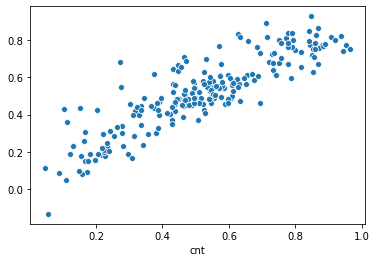

In [38]:
sns.scatterplot(y_cnt_test, y_cnt_pred)

In [39]:
lm_test = sm.OLS(y_cnt_test, X_cnt_test_new_sm).fit()
lm_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     94.80
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.96e-65
Time:                        20:46:26   Log-Likelihood:                 190.29
No. Observations:                 219   AIC:                            -362.6
Df Residuals:                     210   BIC:                            -332.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0338      0.028      1.198      0.232      -0.022       0.089
holiday       -0.0752      0.038     -2.002      0.047      -0.149      -0.001
temp           0.5896      0.033     18.100      0.000       0.525       0.654
windspeed     -0.0257      0.047     -0.549      0.584      -0.118       0.067
summer         0.0759      0.017      4.365      0.000       0.042       0.110
winter         0.1489      0.018      8.051      0.000       0.112       0.185
2019           0.2375      0.014     16.728      0.000       0.210       0.266
Sep            0.0584      0.026      2.231      0.027       0.007       0.110
light_snow    -0.2087      0.044     -4.698      0.000      -0.296      -0.121
==============================================================================
Omnibus:                       18.778   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.772
Skew:                          -0.659   Prob(JB):                     1.87e-05
Kurtosis:                       3.807   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary for cnt

The training set has an R-squared of 0.804 whereas the test set has an r-squared value of 0.783

The prediction is quite dependant on the parameters such as holiday, temp, windspeed, summer, winter, 2019, sep, light_snow.

### Considering "registered" as a dependant variable

In [40]:
df_train, df_test = train_test_split(data, test_size=0.3, random_state=100)

df_train[num_var] = scaler.fit_transform(df_train[num_var])

y_reg_train = df_train.pop('registered')
X_reg_train = df_train

X_reg_train = X_reg_train.drop(['casual', 'cnt'], axis=1)

### Model Building

In [41]:
lms = LinearRegression()
lms.fit(X_reg_train, y_reg_train)
rfe = RFE(lms, 15)
rfe = rfe.fit(X_reg_train, y_reg_train)

In [42]:
col = X_reg_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       '2019', 'Sep', 'light_snow', 'd1', 'd2', 'd3', 'd4', 'd5'],
      dtype='object')

In [43]:
X_reg_train_rfe = X_reg_train[col]

In [44]:
# create a constant

X_reg_train_rfe = sm.add_constant(X_reg_train_rfe)
lm = sm.OLS(y_reg_train, X_reg_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.8
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          2.44e-188
Time:                        20:46:26   Log-Likelihood:                 501.25
No. Observations:                 511   AIC:                            -972.5
Df Residuals:                     496   BIC:                            -909.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1960      0.027      7.377      0.000       0.144       0.248
holiday       -0.0447      0.023     -1.906      0.057      -0.091       0.001
workingday     0.1228      0.008     15.600      0.000       0.107       0.138
temp           0.5097      0.020     25.660      0.000       0.471       0.549
hum           -0.2562      0.031     -8.174      0.000      -0.318      -0.195
windspeed     -0.1727      0.026     -6.671      0.000      -0.224      -0.122
summer         0.0659      0.010      6.380      0.000       0.046       0.086
winter         0.1607      0.011     15.256      0.000       0.140       0.181
2019           0.2464      0.008     29.806      0.000       0.230       0.263
Sep            0.1000      0.016      6.310      0.000       0.069       0.131
light_snow    -0.2066      0.026     -8.089      0.000      -0.257      -0.156
d1             0.0036      0.010      0.366      0.714      -0.016       0.023
d2             0.0164      0.011      1.459      0.145      -0.006       0.039
d3             0.0305      0.011      2.872      0.004       0.010       0.051
d4             0.0213      0.011      1.939      0.053      -0.000       0.043
d5             0.0062      0.011      0.552      0.582      -0.016       0.028
==============================================================================
Omnibus:                      112.288   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.104
Skew:                          -1.092   Prob(JB):                     2.75e-63
Kurtosis:                       5.960   Cond. No.                     1.67e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.23e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
# d1 is having a p-value of 0.714 and has to be dropped

X_reg_train_new = X_reg_train_rfe.drop('d1', axis=1)

In [46]:
X_reg_train_rfe = sm.add_constant(X_reg_train_new)
lm = sm.OLS(y_reg_train, X_reg_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.8
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          2.44e-188
Time:                        20:46:26   Log-Likelihood:                 501.25
No. Observations:                 511   AIC:                            -972.5
Df Residuals:                     496   BIC:                            -909.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1960      0.027      7.377      0.000       0.144       0.248
holiday       -0.0411      0.027     -1.528      0.127      -0.094       0.012
workingday     0.1264      0.013      9.438      0.000       0.100       0.153
temp           0.5097      0.020     25.660      0.000       0.471       0.549
hum           -0.2562      0.031     -8.174      0.000      -0.318      -0.195
windspeed     -0.1727      0.026     -6.671      0.000      -0.224      -0.122
summer         0.0659      0.010      6.380      0.000       0.046       0.086
winter         0.1607      0.011     15.256      0.000       0.140       0.181
2019           0.2464      0.008     29.806      0.000       0.230       0.263
Sep            0.1000      0.016      6.310      0.000       0.069       0.131
light_snow    -0.2066      0.026     -8.089      0.000      -0.257      -0.156
d2             0.0128      0.016      0.813      0.417      -0.018       0.044
d3             0.0269      0.015      1.778      0.076      -0.003       0.057
d4             0.0177      0.016      1.132      0.258      -0.013       0.048
d5             0.0026      0.016      0.166      0.868      -0.029       0.034
==============================================================================
Omnibus:                      112.288   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.104
Skew:                          -1.092   Prob(JB):                     2.75e-63
Kurtosis:                       5.960   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# d5 is having a p-value of 0.8 and has to be dropped

X_reg_train_new = X_reg_train_new.drop('d5', axis=1)

X_reg_train_rfe = sm.add_constant(X_reg_train_new)
lm = sm.OLS(y_reg_train, X_reg_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.70e-189
Time:                        20:46:26   Log-Likelihood:                 501.24
No. Observations:                 511   AIC:                            -974.5
Df Residuals:                     497   BIC:                            -915.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1961      0.027      7.392      0.000       0.144       0.248
holiday       -0.0407      0.027     -1.521      0.129      -0.093       0.012
workingday     0.1277      0.011     11.649      0.000       0.106       0.149
temp           0.5098      0.020     25.693      0.000       0.471       0.549
hum           -0.2563      0.031     -8.187      0.000      -0.318      -0.195
windspeed     -0.1728      0.026     -6.678      0.000      -0.224      -0.122
summer         0.0659      0.010      6.385      0.000       0.046       0.086
winter         0.1606      0.011     15.276      0.000       0.140       0.181
2019           0.2464      0.008     29.868      0.000       0.230       0.263
Sep            0.1000      0.016      6.316      0.000       0.069       0.131
light_snow    -0.2067      0.025     -8.109      0.000      -0.257      -0.157
d2             0.0115      0.014      0.840      0.401      -0.015       0.039
d3             0.0256      0.013      1.966      0.050    1.53e-05       0.051
d4             0.0164      0.014      1.203      0.230      -0.010       0.043
==============================================================================
Omnibus:                      112.106   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.926
Skew:                          -1.090   Prob(JB):                     3.00e-63
Kurtosis:                       5.961   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# d2 is having a p-value of 0.4 and has to be dropped

X_reg_train_new = X_reg_train_new.drop('d2', axis=1)

X_reg_train_rfe = sm.add_constant(X_reg_train_new)
lm = sm.OLS(y_reg_train, X_reg_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.59e-190
Time:                        20:46:26   Log-Likelihood:                 500.88
No. Observations:                 511   AIC:                            -975.8
Df Residuals:                     498   BIC:                            -920.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1958      0.027      7.383      0.000       0.144       0.248
holiday       -0.0401      0.027     -1.498      0.135      -0.093       0.012
workingday     0.1316      0.010     13.262      0.000       0.112       0.151
temp           0.5104      0.020     25.750      0.000       0.471       0.549
hum           -0.2564      0.031     -8.195      0.000      -0.318      -0.195
windspeed     -0.1725      0.026     -6.671      0.000      -0.223      -0.122
summer         0.0660      0.010      6.401      0.000       0.046       0.086
winter         0.1607      0.011     15.296      0.000       0.140       0.181
2019           0.2462      0.008     29.866      0.000       0.230       0.262
Sep            0.1000      0.016      6.318      0.000       0.069       0.131
light_snow    -0.2067      0.025     -8.113      0.000      -0.257      -0.157
d3             0.0217      0.012      1.784      0.075      -0.002       0.046
d4             0.0126      0.013      0.980      0.328      -0.013       0.038
==============================================================================
Omnibus:                      110.675   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.787
Skew:                          -1.084   Prob(JB):                     2.90e-61
Kurtosis:                       5.897   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# d4 is having a p-value of 0.3 and has to be dropped

X_reg_train_new = X_reg_train_new.drop('d4', axis=1)

X_reg_train_rfe = sm.add_constant(X_reg_train_new)
lm = sm.OLS(y_reg_train, X_reg_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.61e-191
Time:                        20:46:26   Log-Likelihood:                 500.38
No. Observations:                 511   AIC:                            -976.8
Df Residuals:                     499   BIC:                            -925.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1971      0.026      7.443      0.000       0.145       0.249
holiday       -0.0382      0.027     -1.432      0.153      -0.091       0.014
workingday     0.1347      0.009     14.359      0.000       0.116       0.153
temp           0.5103      0.020     25.747      0.000       0.471       0.549
hum           -0.2582      0.031     -8.264      0.000      -0.320      -0.197
windspeed     -0.1728      0.026     -6.684      0.000      -0.224      -0.122
summer         0.0659      0.010      6.386      0.000       0.046       0.086
winter         0.1607      0.011     15.290      0.000       0.140       0.181
2019           0.2461      0.008     29.854      0.000       0.230       0.262
Sep            0.1005      0.016      6.356      0.000       0.069       0.132
light_snow    -0.2051      0.025     -8.066      0.000      -0.255      -0.155
d3             0.0185      0.012      1.579      0.115      -0.005       0.042
==============================================================================
Omnibus:                      109.265   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.192
Skew:                          -1.071   Prob(JB):                     1.75e-60
Kurtosis:                       5.888   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# holiday is having a p-value of 0.1 and has to be dropped

X_reg_train_new = X_reg_train_new.drop('holiday', axis=1)

X_reg_train_rfe = sm.add_constant(X_reg_train_new)
lm = sm.OLS(y_reg_train, X_reg_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     264.0
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          2.68e-192
Time:                        20:46:26   Log-Likelihood:                 499.34
No. Observations:                 511   AIC:                            -976.7
Df Residuals:                     500   BIC:                            -930.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1931      0.026      7.324      0.000       0.141       0.245
workingday     0.1377      0.009     15.020      0.000       0.120       0.156
temp           0.5116      0.020     25.814      0.000       0.473       0.551
hum           -0.2574      0.031     -8.231      0.000      -0.319      -0.196
windspeed     -0.1731      0.026     -6.690      0.000      -0.224      -0.122
summer         0.0663      0.010      6.425      0.000       0.046       0.087
winter         0.1603      0.011     15.246      0.000       0.140       0.181
2019           0.2461      0.008     29.830      0.000       0.230       0.262
Sep            0.0992      0.016      6.278      0.000       0.068       0.130
light_snow    -0.2041      0.025     -8.021      0.000      -0.254      -0.154
d3             0.0185      0.012      1.573      0.116      -0.005       0.042
==============================================================================
Omnibus:                      115.855   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.007
Skew:                          -1.114   Prob(JB):                     2.16e-67
Kurtosis:                       6.076   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# d3 is having a p-value of 0.1 and has to be dropped

X_reg_train_new = X_reg_train_new.drop('d3', axis=1)

X_reg_train_rfe = sm.add_constant(X_reg_train_new)
lm = sm.OLS(y_reg_train, X_reg_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     292.2
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          5.22e-193
Time:                        20:46:26   Log-Likelihood:                 498.07
No. Observations:                 511   AIC:                            -976.1
Df Residuals:                     501   BIC:                            -933.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1927      0.026      7.300      0.000       0.141       0.245
workingday     0.1419      0.009     16.183      0.000       0.125       0.159
temp           0.5115      0.020     25.771      0.000       0.473       0.551
hum           -0.2567      0.031     -8.197      0.000      -0.318      -0.195
windspeed     -0.1736      0.026     -6.698      0.000      -0.225      -0.123
summer         0.0668      0.010      6.463      0.000       0.046       0.087
winter         0.1601      0.011     15.206      0.000       0.139       0.181
2019           0.2460      0.008     29.776      0.000       0.230       0.262
Sep            0.0998      0.016      6.307      0.000       0.069       0.131
light_snow    -0.2011      0.025     -7.913      0.000      -0.251      -0.151
==============================================================================
Omnibus:                      117.119   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.679
Skew:                          -1.118   Prob(JB):                     1.71e-69
Kurtosis:                       6.143   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# calculate VIF
X_reg_train_new = X_reg_train_new.drop('const', axis=1)

vif = pd.DataFrame()
vif['features'] = X_reg_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_reg_train_new.values, i) for i in range(X_reg_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,hum,10.83
1,temp,7.20
3,windspeed,3.56
0,workingday,3.00
6,2019,2.03
5,winter,1.64
4,summer,1.58
7,Sep,1.20
8,light_snow,1.09


In [53]:
X_reg_train_new = X_reg_train_new.drop('hum', axis=1)

X_reg_train_rfe = sm.add_constant(X_reg_train_new)
lm = sm.OLS(y_reg_train, X_reg_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.0
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.35e-180
Time:                        20:46:26   Log-Likelihood:                 465.92
No. Observations:                 511   AIC:                            -913.8
Df Residuals:                     502   BIC:                            -875.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0270      0.018      1.495      0.136      -0.008       0.062
workingday     0.1408      0.009     15.089      0.000       0.122       0.159
temp           0.4888      0.021     23.376      0.000       0.448       0.530
windspeed     -0.1202      0.027     -4.505      0.000      -0.173      -0.068
summer         0.0593      0.011      5.421      0.000       0.038       0.081
winter         0.1443      0.011     13.104      0.000       0.123       0.166
2019           0.2522      0.009     28.812      0.000       0.235       0.269
Sep            0.0855      0.017      5.107      0.000       0.053       0.118
light_snow    -0.2553      0.026     -9.784      0.000      -0.307      -0.204
==============================================================================
Omnibus:                      113.569   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.543
Skew:                          -1.096   Prob(JB):                     2.45e-65
Kurtosis:                       6.028   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['features'] = X_reg_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_reg_train_new.values, i) for i in range(X_reg_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
1,temp,4.27
2,windspeed,3.10
0,workingday,2.77
5,2019,2.02
3,summer,1.56
4,winter,1.36
6,Sep,1.19
7,light_snow,1.06


### Continue the similar steps for test set

In [55]:
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,...,Nov,Dec,mist,light_snow,d1,d2,d3,d4,d5,d6
184,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,1,0,1,0,0,0,0,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,1,...,0,0,0,0,0,0,1,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,0,0,1,0,0,0,0,1,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,1,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,1,...,0,0,0,0,0,0,0,1,0,0


In [56]:
y_reg_test = df_test.pop('registered')
X_reg_test = df_test

X_reg_test = X_reg_test.drop(['casual', 'cnt'], axis=1)

In [57]:
X_reg_test_new = X_reg_test[X_reg_train_new.columns]

# adding a constant variable
X_reg_test_new_sm = sm.add_constant(X_reg_test_new)

In [58]:
y_reg_pred = lm.predict(X_reg_test_new_sm)

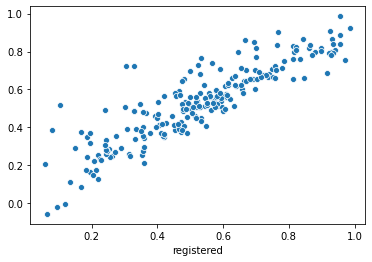

In [59]:
sns.scatterplot(y_reg_test, y_reg_pred)

In [60]:
lm_test = sm.OLS(y_reg_test, X_reg_test_new_sm).fit()
lm_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     99.93
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           2.59e-67
Time:                        20:46:27   Log-Likelihood:                 195.35
No. Observations:                 219   AIC:                            -372.7
Df Residuals:                     210   BIC:                            -342.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0152      0.029     -0.529      0.597      -0.072       0.042
workingday     0.1251      0.015      8.186      0.000       0.095       0.155
temp           0.5136      0.032     16.090      0.000       0.451       0.576
windspeed     -0.0147      0.046     -0.321      0.748      -0.105       0.076
summer         0.0551      0.017      3.235      0.001       0.022       0.089
winter         0.1644      0.018      9.000      0.000       0.128       0.200
2019           0.2505      0.014     18.023      0.000       0.223       0.278
Sep            0.0632      0.026      2.458      0.015       0.013       0.114
light_snow    -0.2147      0.043     -4.944      0.000      -0.300      -0.129
==============================================================================
Omnibus:                       49.206   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.614
Skew:                          -1.152   Prob(JB):                     5.72e-20
Kurtosis:                       5.098   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary for registered

The training set has an R-squared of 0.819 whereas the test set has an r-squared value of 0.792

The prediction is quite dependant on the parameters such as workingday, temp, windspeed, summer, winter, 2019, sep, light_snow.

### Considering "casual" as a dependant variable

In [61]:
df_train, df_test = train_test_split(data, test_size=0.3, random_state=100)

df_train[num_var] = scaler.fit_transform(df_train[num_var])

y_cas_train = df_train.pop('casual')
X_cas_train = df_train

X_cas_train = X_cas_train.drop(['registered', 'cnt'], axis=1)

### Model Building

In [62]:
lms = LinearRegression()
lms.fit(X_cas_train, y_cas_train)
rfe = RFE(lms, 15)
rfe = rfe.fit(X_cas_train, y_cas_train)

In [63]:
col = X_cas_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer', '2019',
       'Sep', 'Oct', 'light_snow', 'd1', 'd2', 'd3', 'd4', 'd5'],
      dtype='object')

In [64]:
X_cas_train_rfe = X_cas_train[col]

In [65]:
# create a constant

X_cas_train_rfe = sm.add_constant(X_cas_train_rfe)
lm = sm.OLS(y_cas_train, X_cas_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     102.3
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          3.54e-136
Time:                        20:46:27   Log-Likelihood:                 430.08
No. Observations:                 511   AIC:                            -830.2
Df Residuals:                     496   BIC:                            -766.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2889      0.030      9.503      0.000       0.229       0.349
holiday       -0.0790      0.027     -2.928      0.004      -0.132      -0.026
workingday    -0.1963      0.009    -21.706      0.000      -0.214      -0.179
temp           0.4706      0.022     21.144      0.000       0.427       0.514
hum           -0.2039      0.036     -5.693      0.000      -0.274      -0.134
windspeed     -0.1804      0.030     -6.072      0.000      -0.239      -0.122
summer         0.0955      0.012      8.276      0.000       0.073       0.118
2019           0.0833      0.010      8.763      0.000       0.065       0.102
Sep            0.0753      0.018      4.098      0.000       0.039       0.111
Oct            0.0994      0.018      5.664      0.000       0.065       0.134
light_snow    -0.0970      0.029     -3.292      0.001      -0.155      -0.039
d1            -0.0540      0.011     -4.773      0.000      -0.076      -0.032
d2            -0.0711      0.013     -5.500      0.000      -0.097      -0.046
d3            -0.0727      0.012     -5.956      0.000      -0.097      -0.049
d4            -0.0577      0.013     -4.563      0.000      -0.083      -0.033
d5            -0.0197      0.013     -1.514      0.131      -0.045       0.006
==============================================================================
Omnibus:                       61.211   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.986
Skew:                           0.650   Prob(JB):                     1.09e-30
Kurtosis:                       5.189   Cond. No.                     1.64e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.32e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
# d5 is having a p-value of 0.131 and has to be dropped

X_cas_train_new = X_cas_train_rfe.drop('d5', axis=1)

X_cas_train_rfe = sm.add_constant(X_cas_train_new)
lm = sm.OLS(y_cas_train, X_cas_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     102.3
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          3.54e-136
Time:                        20:46:27   Log-Likelihood:                 430.08
No. Observations:                 511   AIC:                            -830.2
Df Residuals:                     496   BIC:                            -766.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2889      0.030      9.503      0.000       0.229       0.349
holiday       -0.0987      0.035     -2.857      0.004      -0.167      -0.031
workingday    -0.2160      0.016    -13.732      0.000      -0.247      -0.185
temp           0.4706      0.022     21.144      0.000       0.427       0.514
hum           -0.2039      0.036     -5.693      0.000      -0.274      -0.134
windspeed     -0.1804      0.030     -6.072      0.000      -0.239      -0.122
summer         0.0955      0.012      8.276      0.000       0.073       0.118
2019           0.0833      0.010      8.763      0.000       0.065       0.102
Sep            0.0753      0.018      4.098      0.000       0.039       0.111
Oct            0.0994      0.018      5.664      0.000       0.065       0.134
light_snow    -0.0970      0.029     -3.292      0.001      -0.155      -0.039
d1            -0.0344      0.018     -1.884      0.060      -0.070       0.001
d2            -0.0515      0.018     -2.799      0.005      -0.088      -0.015
d3            -0.0530      0.018     -2.991      0.003      -0.088      -0.018
d4            -0.0381      0.018     -2.064      0.040      -0.074      -0.002
==============================================================================
Omnibus:                       61.211   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.986
Skew:                           0.650   Prob(JB):                     1.09e-30
Kurtosis:                       5.189   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# d1 is having a p-value of 0.06 and has to be dropped

X_cas_train_new = X_cas_train_new.drop('d1', axis=1)

X_cas_train_rfe = sm.add_constant(X_cas_train_new)
lm = sm.OLS(y_cas_train, X_cas_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     109.3
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.92e-136
Time:                        20:46:27   Log-Likelihood:                 428.25
No. Observations:                 511   AIC:                            -828.5
Df Residuals:                     497   BIC:                            -769.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2901      0.030      9.520      0.000       0.230       0.350
holiday       -0.1280      0.031     -4.143      0.000      -0.189      -0.067
workingday    -0.2337      0.013    -18.491      0.000      -0.259      -0.209
temp           0.4718      0.022     21.154      0.000       0.428       0.516
hum           -0.2056      0.036     -5.728      0.000      -0.276      -0.135
windspeed     -0.1803      0.030     -6.056      0.000      -0.239      -0.122
summer         0.0949      0.012      8.203      0.000       0.072       0.118
2019           0.0823      0.010      8.652      0.000       0.064       0.101
Sep            0.0753      0.018      4.088      0.000       0.039       0.112
Oct            0.0987      0.018      5.611      0.000       0.064       0.133
light_snow    -0.0991      0.030     -3.354      0.001      -0.157      -0.041
d2            -0.0338      0.016     -2.131      0.034      -0.065      -0.003
d3            -0.0352      0.015     -2.342      0.020      -0.065      -0.006
d4            -0.0200      0.016     -1.268      0.205      -0.051       0.011
==============================================================================
Omnibus:                       62.882   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.127
Skew:                           0.668   Prob(JB):                     2.26e-31
Kurtosis:                       5.201   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# d4 is having a p-value of 0.2 and has to be dropped

X_cas_train_new = X_cas_train_new.drop('d4', axis=1)

X_cas_train_rfe = sm.add_constant(X_cas_train_new)
lm = sm.OLS(y_cas_train, X_cas_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     118.1
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          3.82e-137
Time:                        20:46:27   Log-Likelihood:                 427.43
No. Observations:                 511   AIC:                            -828.9
Df Residuals:                     498   BIC:                            -773.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2885      0.030      9.470      0.000       0.229       0.348
holiday       -0.1310      0.031     -4.250      0.000      -0.192      -0.070
workingday    -0.2404      0.011    -20.915      0.000      -0.263      -0.218
temp           0.4715      0.022     21.129      0.000       0.428       0.515
hum           -0.2034      0.036     -5.670      0.000      -0.274      -0.133
windspeed     -0.1800      0.030     -6.043      0.000      -0.239      -0.122
summer         0.0952      0.012      8.225      0.000       0.072       0.118
2019           0.0826      0.010      8.681      0.000       0.064       0.101
Sep            0.0747      0.018      4.055      0.000       0.039       0.111
Oct            0.0999      0.018      5.682      0.000       0.065       0.134
light_snow    -0.1016      0.029     -3.445      0.001      -0.160      -0.044
d2            -0.0271      0.015     -1.812      0.071      -0.056       0.002
d3            -0.0285      0.014     -2.022      0.044      -0.056      -0.001
==============================================================================
Omnibus:                       63.049   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.887
Skew:                           0.671   Prob(JB):                     2.55e-31
Kurtosis:                       5.194   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# d2 is having a p-value of 0.07 and has to be dropped

X_cas_train_new = X_cas_train_new.drop('d2', axis=1)

X_cas_train_rfe = sm.add_constant(X_cas_train_new)
lm = sm.OLS(y_cas_train, X_cas_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     128.0
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.68e-137
Time:                        20:46:27   Log-Likelihood:                 425.75
No. Observations:                 511   AIC:                            -827.5
Df Residuals:                     499   BIC:                            -776.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2900      0.031      9.502      0.000       0.230       0.350
holiday       -0.1312      0.031     -4.246      0.000      -0.192      -0.070
workingday    -0.2473      0.011    -22.771      0.000      -0.269      -0.226
temp           0.4702      0.022     21.032      0.000       0.426       0.514
hum           -0.2043      0.036     -5.682      0.000      -0.275      -0.134
windspeed     -0.1808      0.030     -6.055      0.000      -0.239      -0.122
summer         0.0948      0.012      8.172      0.000       0.072       0.118
2019           0.0828      0.010      8.684      0.000       0.064       0.102
Sep            0.0751      0.018      4.064      0.000       0.039       0.111
Oct            0.0993      0.018      5.638      0.000       0.065       0.134
light_snow    -0.1003      0.030     -3.394      0.001      -0.158      -0.042
d3            -0.0215      0.014     -1.586      0.113      -0.048       0.005
==============================================================================
Omnibus:                       62.891   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.600
Skew:                           0.674   Prob(JB):                     8.00e-31
Kurtosis:                       5.166   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# d3 is having a p-value of 0.113 and has to be dropped

X_cas_train_new = X_cas_train_new.drop('d3', axis=1)

X_cas_train_rfe = sm.add_constant(X_cas_train_new)
lm = sm.OLS(y_cas_train, X_cas_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     140.1
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          4.80e-138
Time:                        20:46:27   Log-Likelihood:                 424.46
No. Observations:                 511   AIC:                            -826.9
Df Residuals:                     500   BIC:                            -780.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2905      0.031      9.505      0.000       0.230       0.351
holiday       -0.1313      0.031     -4.244      0.000      -0.192      -0.071
workingday    -0.2523      0.010    -24.224      0.000      -0.273      -0.232
temp           0.4702      0.022     21.001      0.000       0.426       0.514
hum           -0.2051      0.036     -5.697      0.000      -0.276      -0.134
windspeed     -0.1803      0.030     -6.029      0.000      -0.239      -0.122
summer         0.0942      0.012      8.116      0.000       0.071       0.117
2019           0.0829      0.010      8.682      0.000       0.064       0.102
Sep            0.0745      0.018      4.025      0.000       0.038       0.111
Oct            0.0997      0.018      5.651      0.000       0.065       0.134
light_snow    -0.1039      0.030     -3.520      0.000      -0.162      -0.046
==============================================================================
Omnibus:                       61.926   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.512
Skew:                           0.665   Prob(JB):                     2.27e-30
Kurtosis:                       5.155   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# calculate VIF
X_cas_train_new = X_cas_train_new.drop('const', axis=1)

vif = pd.DataFrame()
vif['features'] = X_cas_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_cas_train_new.values, i) for i in range(X_cas_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
3,hum,9.44
2,temp,6.90
4,windspeed,3.59
1,workingday,3.15
6,2019,2.02
5,summer,1.49
7,Sep,1.22
8,Oct,1.20
9,light_snow,1.10
0,holiday,1.08


In [72]:
X_cas_train_new = X_cas_train_new.drop('hum', axis=1)

X_cas_train_rfe = sm.add_constant(X_cas_train_new)
lm = sm.OLS(y_cas_train, X_cas_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     143.1
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          2.39e-132
Time:                        20:46:27   Log-Likelihood:                 408.40
No. Observations:                 511   AIC:                            -796.8
Df Residuals:                     501   BIC:                            -754.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1517      0.019      7.974      0.000       0.114       0.189
holiday       -0.1293      0.032     -4.052      0.000      -0.192      -0.067
workingday    -0.2530      0.011    -23.561      0.000      -0.274      -0.232
temp           0.4578      0.023     19.928      0.000       0.413       0.503
windspeed     -0.1346      0.030     -4.531      0.000      -0.193      -0.076
summer         0.0901      0.012      7.545      0.000       0.067       0.114
2019           0.0876      0.010      8.938      0.000       0.068       0.107
Sep            0.0616      0.019      3.256      0.001       0.024       0.099
Oct            0.0846      0.018      4.707      0.000       0.049       0.120
light_snow    -0.1468      0.029     -4.991      0.000      -0.205      -0.089
==============================================================================
Omnibus:                       47.927   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.088
Skew:                           0.557   Prob(JB):                     2.25e-21
Kurtosis:                       4.796   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
vif['features'] = X_cas_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_cas_train_new.values, i) for i in range(X_cas_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,temp,4.36
3,windspeed,3.10
1,workingday,2.83
5,2019,2.01
4,summer,1.49
6,Sep,1.22
7,Oct,1.16
0,holiday,1.07
8,light_snow,1.07


### Continue the similar steps for test set

In [74]:
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,...,Nov,Dec,mist,light_snow,d1,d2,d3,d4,d5,d6
184,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,0,...,0,0,1,0,1,0,0,0,0,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,1,...,0,0,0,0,0,0,1,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,...,0,0,1,0,0,0,0,1,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,0,...,0,0,0,0,0,0,1,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,1,...,0,0,0,0,0,0,0,1,0,0


In [75]:
y_cas_test = df_test.pop('casual')
X_cas_test = df_test

X_cas_test = X_cas_test.drop(['registered', 'cnt'], axis=1)

In [76]:
X_cas_test_new = X_cas_test[X_cas_train_new.columns]

# adding a constant variable
X_cas_test_new_sm = sm.add_constant(X_cas_test_new)

In [77]:
y_cas_pred = lm.predict(X_cas_test_new_sm)

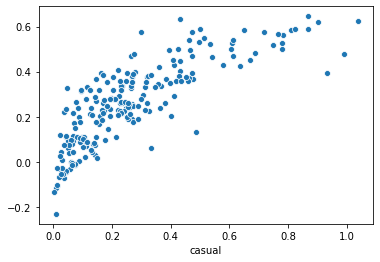

In [78]:
sns.scatterplot(y_cas_test, y_cas_pred)

In [79]:
lm_test = sm.OLS(y_cas_test, X_cas_test_new_sm).fit()
lm_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     46.33
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           4.32e-45
Time:                        20:46:27   Log-Likelihood:                 144.23
No. Observations:                 219   AIC:                            -268.5
Df Residuals:                     209   BIC:                            -234.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1350      0.035      3.914      0.000       0.067       0.203
holiday       -0.0378      0.049     -0.776      0.439      -0.134       0.058
workingday    -0.2552      0.020    -12.676      0.000      -0.295      -0.216
temp           0.4529      0.040     11.387      0.000       0.374       0.531
windspeed     -0.0525      0.056     -0.931      0.353      -0.164       0.059
summer         0.0800      0.021      3.768      0.000       0.038       0.122
2019           0.0974      0.018      5.533      0.000       0.063       0.132
Sep            0.0432      0.033      1.317      0.189      -0.021       0.108
Oct            0.0626      0.033      1.898      0.059      -0.002       0.128
light_snow    -0.0889      0.055     -1.620      0.107      -0.197       0.019
==============================================================================
Omnibus:                       25.155   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.382
Skew:                           0.647   Prob(JB):                     1.03e-09
Kurtosis:                       4.691   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary for casual

The training set has an R-squared of 0.720 whereas the test set has an r-squared value of 0.699

The prediction is quite dependant on the parameters such as holiday, workingday, temp, windspeed, summer, 2019, sep, Oct,  light_snow.

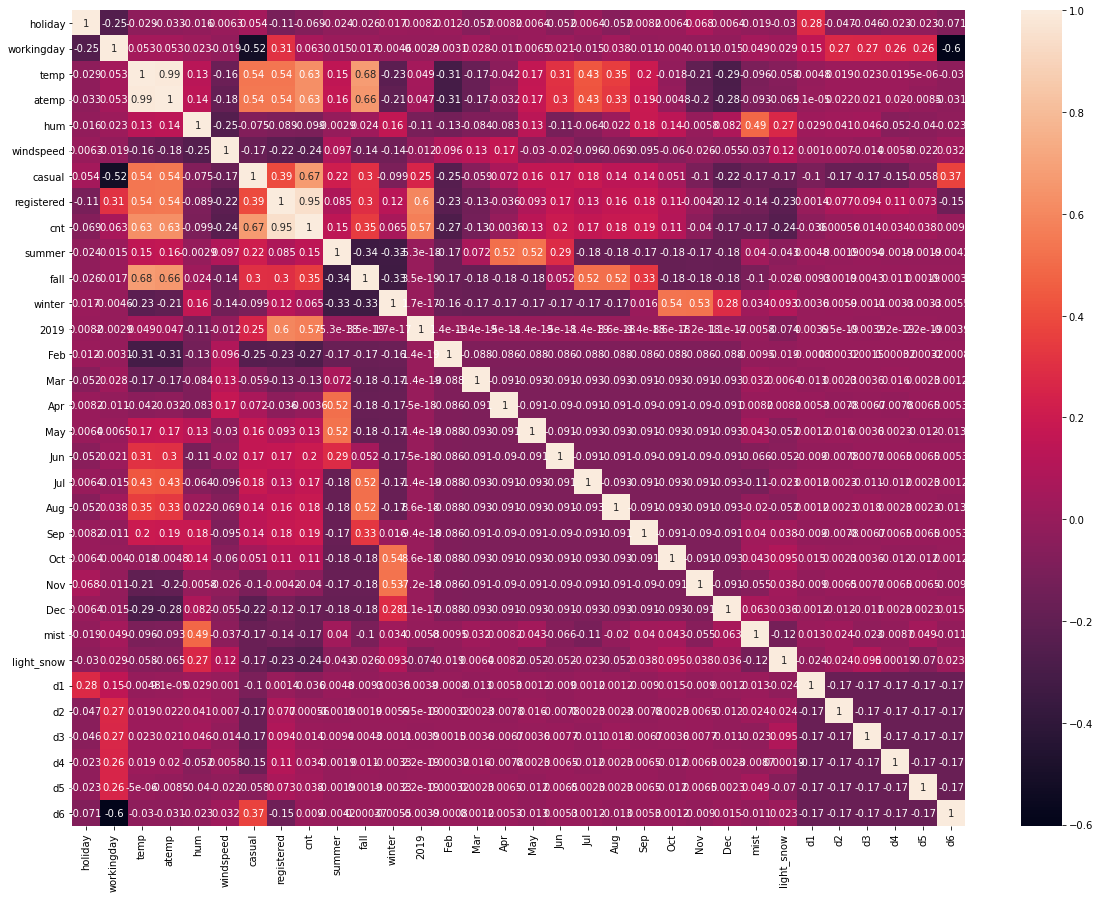

In [86]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)